# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
all_movies_df = pd.read_csv("../data/AllMoviesDetailsCleaned.csv", encoding='utf-8-sig', sep=";", engine="python",parse_dates=["release_date"])

/home/abdurraouf/.pyenv/versions/3.8.12/envs/.pde_cap/lib/python3.8/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '21/10/1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/abdurraouf/.pyenv/versions/3.8.12/envs/.pde_cap/lib/python3.8/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/10/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/abdurraouf/.pyenv/versions/3.8.12/envs/.pde_cap/lib/python3.8/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '25/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/abdurraouf/.pyenv/versions/3.8.12/envs/.pde_cap/lib/python3.8/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '15/10/1993'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
all_movies_df.head(3)

id   budget        genres    imdb_id original_language  \
0   2        0   Drama|Crime  tt0094675                fi   
1   3        0  Drama|Comedy  tt0092149                fi   
2   5  4000000  Crime|Comedy  tt0113101                en   

         original_title                                           overview  \
0                 Ariel  Taisto Kasurinen is a Finnish coal miner whose...   
1  Varjoja paratiisissa  An episode in the life of Nikander, a garbage ...   
2            Four Rooms  It's Ted the Bellhop's first night on the job....   

  popularity         production_companies      production_countries  ...  \
0   0.823904  Villealfa Filmproduction Oy                   Finland  ...   
1    0.47445  Villealfa Filmproduction Oy                   Finland  ...   
2      1.698                Miramax Films  United States of America  ...   

  runtime  spoken_languages    status  \
0    69.0             suomi  Released   
1    76.0           English  Released   
2    98.0           English  Released   

                                             tagline                title  \
0                                                NaN                Ariel   
1                                                NaN  Shadows in Paradise   
2  Twelve outrageous guests. Four scandalous requ...           Four Rooms   

  vote_average vote_count  production_companies_number  \
0          7.1         40                            2   
1          7.0         32                            1   
2          6.5        485                            2   

   production_countries_number  spoken_languages_number  
0                            1                        2  
1                            1                        3  
2                            1                        1  

[3 rows x 22 columns]

# Explore the data

## available columns and the data types in each column

In [4]:
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329044 entries, 0 to 329043
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           329044 non-null  int64         
 1   budget                       329044 non-null  int64         
 2   genres                       207515 non-null  object        
 3   imdb_id                      250564 non-null  object        
 4   original_language            328841 non-null  object        
 5   original_title               329043 non-null  object        
 6   overview                     278060 non-null  object        
 7   popularity                   329044 non-null  object        
 8   production_companies         329044 non-null  object        
 9   production_countries         329044 non-null  object        
 10  release_date                 304998 non-null  datetime64[ns]
 11  revenue                   

##  Percentage of Null Values

In [5]:
round(all_movies_df.isnull().sum()/len(all_movies_df),2).sort_values()

id                             0.00
production_companies_number    0.00
vote_count                     0.00
vote_average                   0.00
title                          0.00
revenue                        0.00
production_countries_number    0.00
production_countries           0.00
spoken_languages_number        0.00
popularity                     0.00
original_title                 0.00
original_language              0.00
budget                         0.00
production_companies           0.00
spoken_languages               0.01
status                         0.01
release_date                   0.07
runtime                        0.11
overview                       0.15
imdb_id                        0.24
genres                         0.37
tagline                        0.84
dtype: float64

In [6]:
# drop id column
all_movies_df.drop('id',axis=1, inplace=True)

In [7]:
tmp = pd.DataFrame(round(all_movies_df.isnull().sum()/len(all_movies_df),2).sort_values())

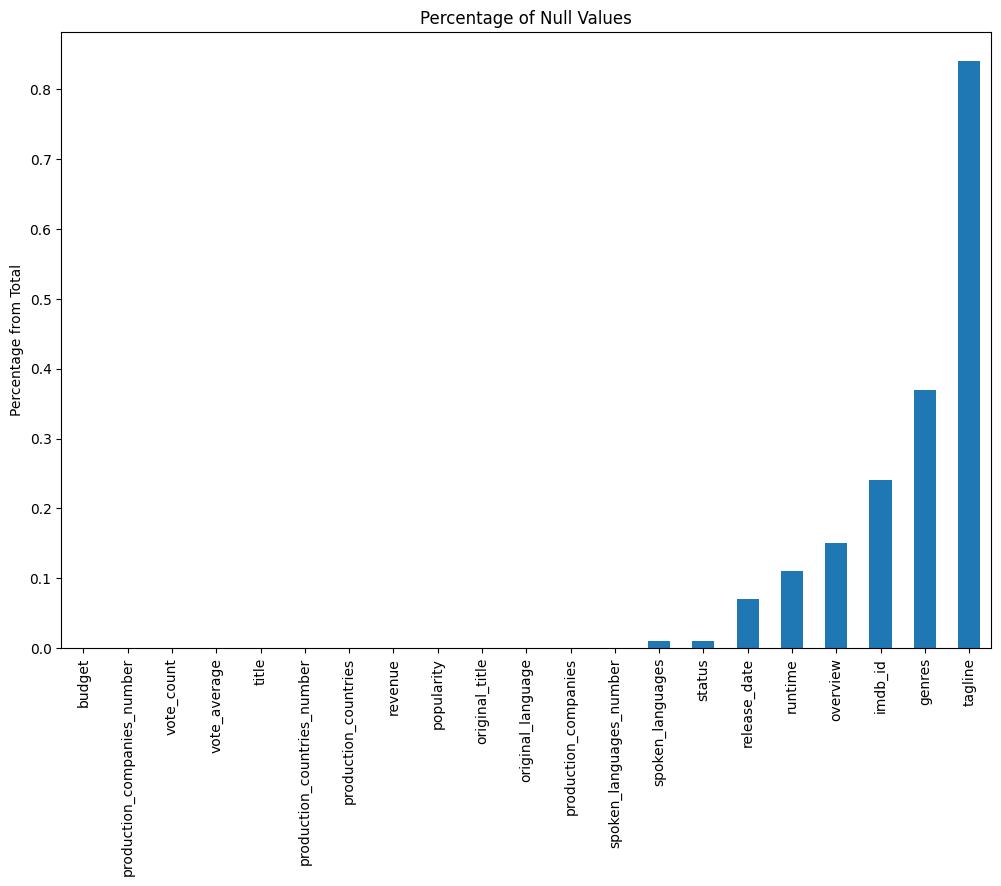

In [8]:
tmp.plot(kind='bar', title='Percentage of Null Values', figsize = (12,8), legend=False, ylabel = 'Percentage from Total');

### remove the column (tagline)  with 84% null values 

In [9]:
all_movies_df.drop('tagline',axis=1, inplace=True)

## Check for Duplicates

In [10]:
print(f'Number of duplicated rows is {all_movies_df.duplicated().sum()}')

Number of duplicated rows is 14


### Drop 14 duplicated rows

In [11]:
all_movies_df.drop_duplicates(inplace=True) # Drop Duplicates

In [12]:
all_movies_df.nunique()

budget                           2100
genres                           7619
imdb_id                        250564
original_language                 134
original_title                 305561
overview                       269149
popularity                      95523
production_companies            35990
production_countries              235
release_date                    35608
revenue                          7458
runtime                           579
spoken_languages                   75
status                              6
title                          296882
vote_average                       97
vote_count                       1705
production_companies_number        26
production_countries_number        17
spoken_languages_number            16
dtype: int64

[Budget] Column has 95% rows with 0 value!

In [13]:
pd.DataFrame(all_movies_df['genres'].value_counts()/len(all_movies_df))

genres
Drama                               0.091755
Documentary                         0.077598
Comedy                              0.068589
Music                               0.024405
Animation                           0.019272
...                                      ...
Mystery|Adventure|Animation|Family  0.000003
Thriller|Crime|Drama|Comedy         0.000003
Animation|Thriller|Drama            0.000003
Western|Action|War|Romance          0.000003
Fantasy|Comedy|Animation|Family     0.000003

[7619 rows x 1 columns]

In [14]:
df = pd.DataFrame(all_movies_df['genres'].value_counts().sort_values())

In [15]:
len(all_movies_df['original_language'].unique())

135

In [16]:
# df[df['month'].str.contains('ju')]

genres = all_movies_df['genres'].dropna()


In [17]:
genres = pd.DataFrame(genres)

In [18]:
genres[genres['genres']=='Drama|Comedy']

genres
1       Drama|Comedy
231     Drama|Comedy
351     Drama|Comedy
356     Drama|Comedy
722     Drama|Comedy
...              ...
328807  Drama|Comedy
328843  Drama|Comedy
328959  Drama|Comedy
329041  Drama|Comedy
329042  Drama|Comedy

[2236 rows x 1 columns]

In [19]:
genres[genres['genres']=='Comedy|Drama']

genres
67      Comedy|Drama
123     Comedy|Drama
141     Comedy|Drama
169     Comedy|Drama
205     Comedy|Drama
...              ...
327806  Comedy|Drama
327807  Comedy|Drama
328248  Comedy|Drama
328360  Comedy|Drama
328950  Comedy|Drama

[3194 rows x 1 columns]

In [20]:
numeric_cols_df = all_movies_df.select_dtypes(include=['int64','float64'])
numeric_cols_df.head(2)

budget  revenue  runtime  vote_average  vote_count  \
0       0        0     69.0           7.1          40   
1       0        0     76.0           7.0          32   

   production_companies_number  production_countries_number  \
0                            2                            1   
1                            1                            1   

   spoken_languages_number  
0                        2  
1                        3

In [27]:
#specify no max value for the column width
pd.set_option('display.max_colwidth', None)
numeric_cols_df.describe()

budget       revenue        runtime   vote_average  \
count  3.290300e+05  3.290300e+05  292241.000000  329030.000000   
mean   6.129334e+05  1.533903e+06      60.408242       2.374557   
std    6.845451e+06  2.401942e+07     142.504527       3.126279   
min    0.000000e+00 -1.200000e+01       0.000000       0.000000   
25%    0.000000e+00  0.000000e+00       5.000000       0.000000   
50%    0.000000e+00  0.000000e+00      71.000000       0.000000   
75%    0.000000e+00  0.000000e+00      94.000000       5.500000   
max    6.000000e+08  2.781506e+09   51420.000000      10.000000   

          vote_count  production_companies_number  \
count  329030.000000                329030.000000   
mean       14.211871                     0.594773   
std       166.447366                     1.038085   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         0.000000                     0.000000   
75%         1.000000                     1.000000   
max     12811.000000                    26.000000   

       production_countries_number  spoken_languages_number  
count                329030.000000            329030.000000  
mean                      0.609905                 0.647655  
std                       0.664863                 0.672049  
min                       0.000000                 0.000000  
25%                       0.000000                 0.000000  
50%                       1.000000                 1.000000  
75%                       1.000000                 1.000000  
max                      26.000000                25.000000

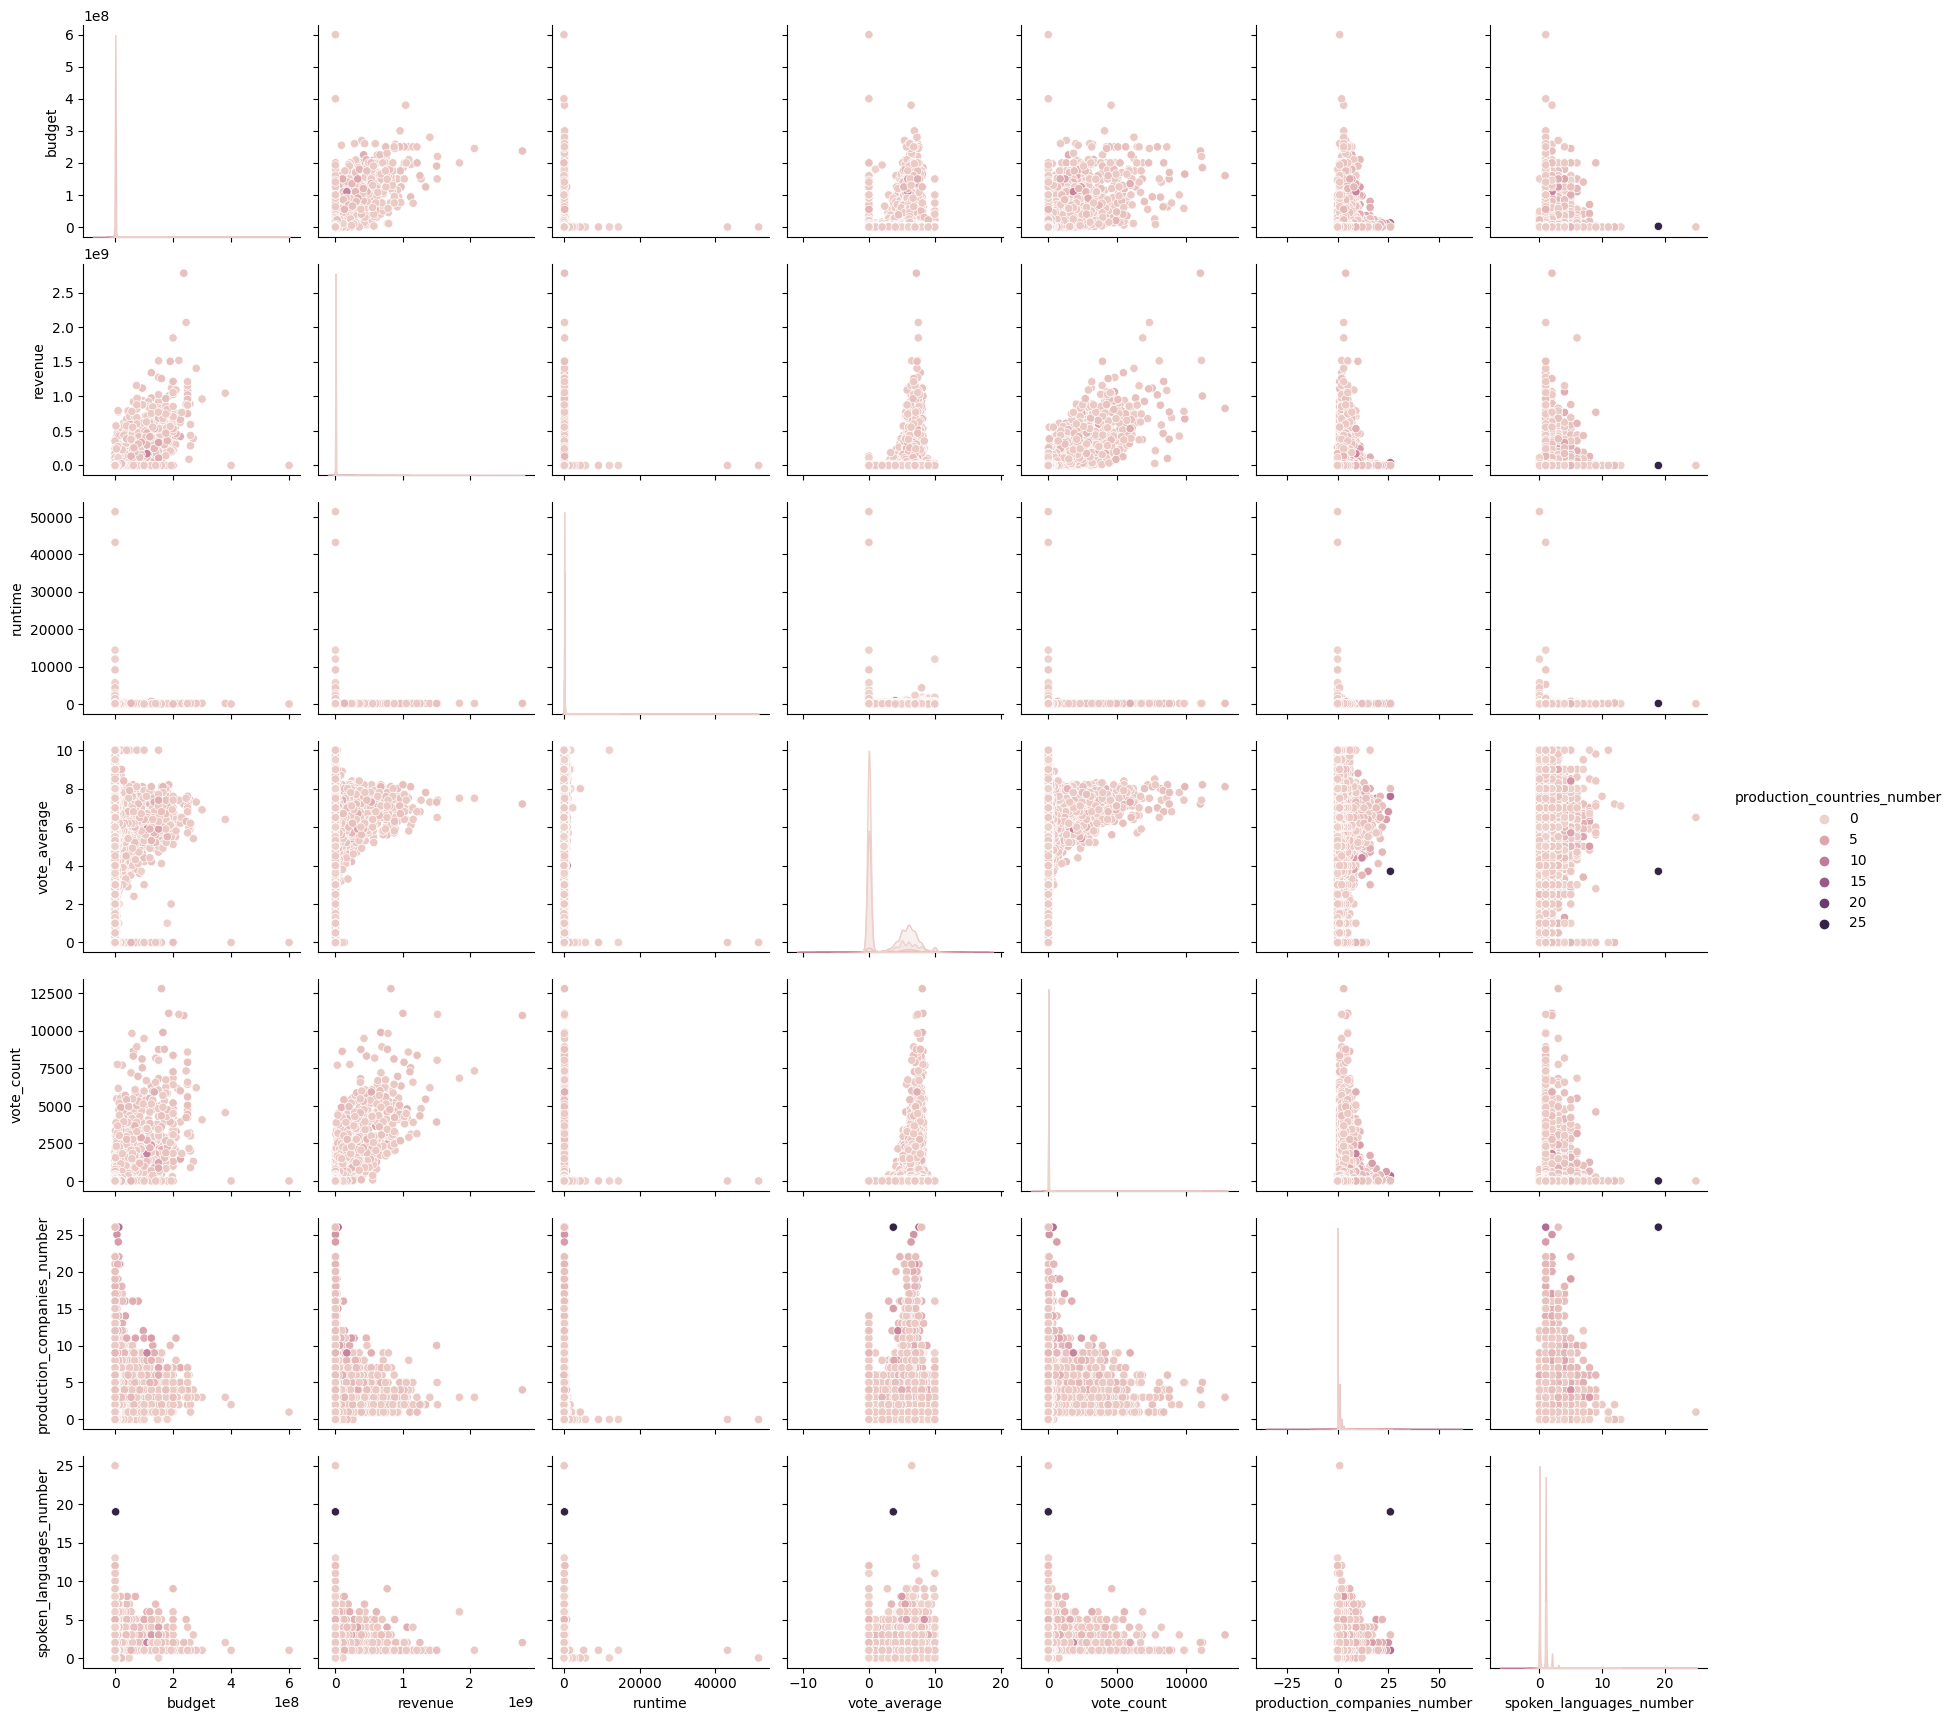

In [22]:
sns.pairplot(numeric_cols_df, hue='production_countries_number')

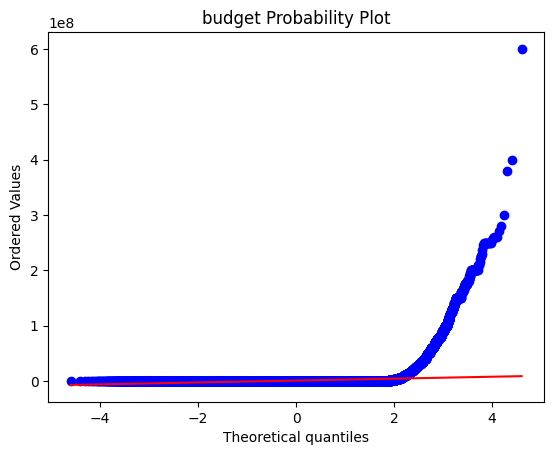

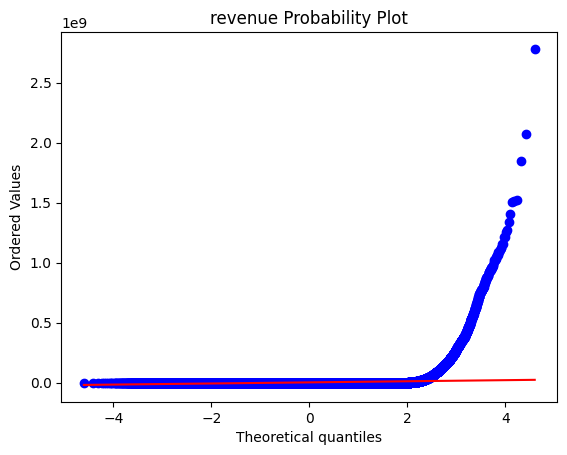

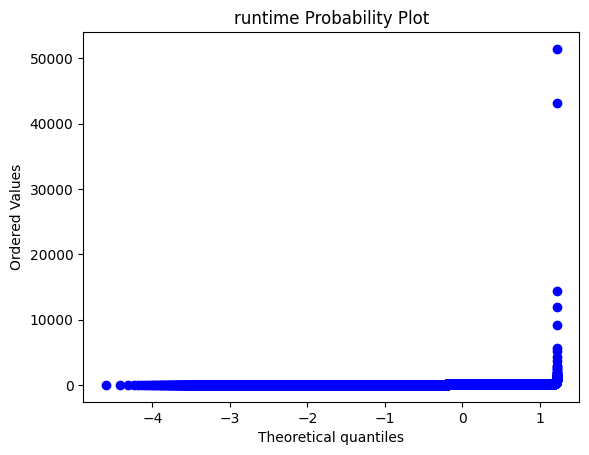

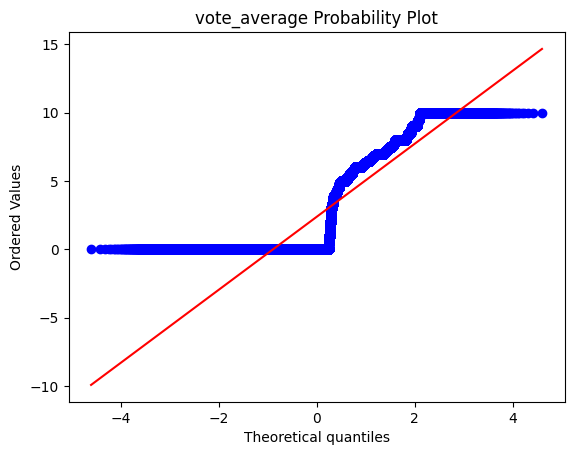

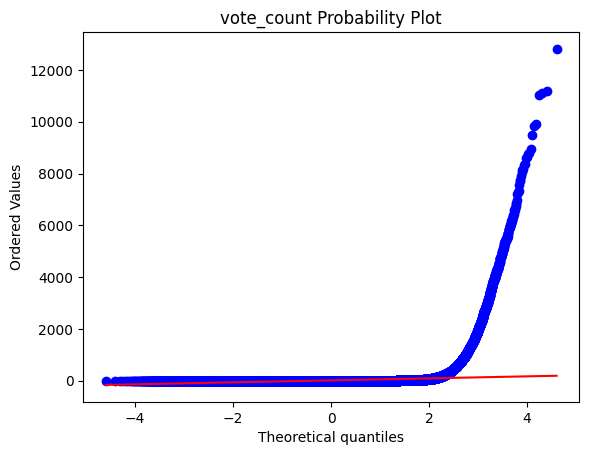

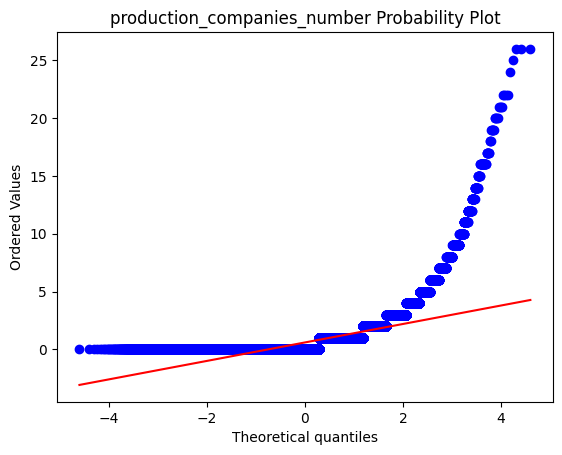

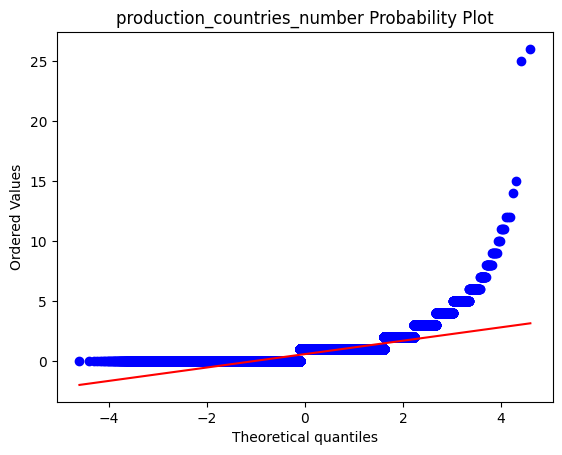

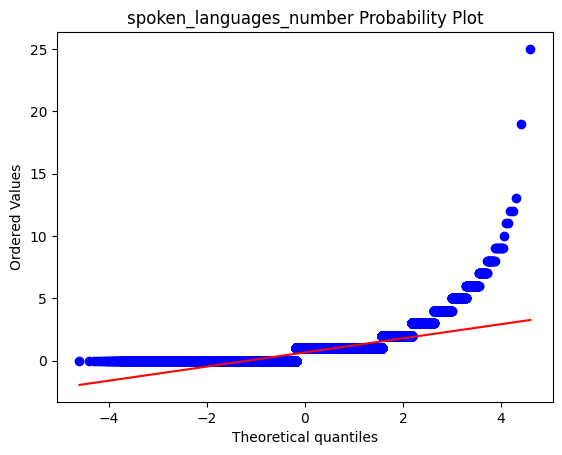

In [23]:
import numpy as np 
import pylab 
import scipy.stats as stats

for col in numeric_cols_df.columns:
    stats.probplot(numeric_cols_df[col], dist="norm", plot=pylab)
    plt.title(col + ' Probability Plot')
    pylab.show();

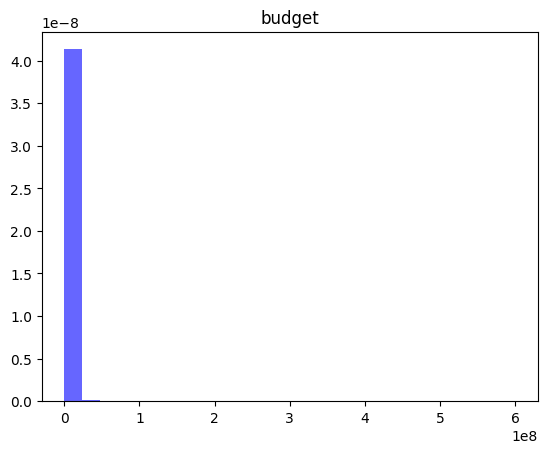

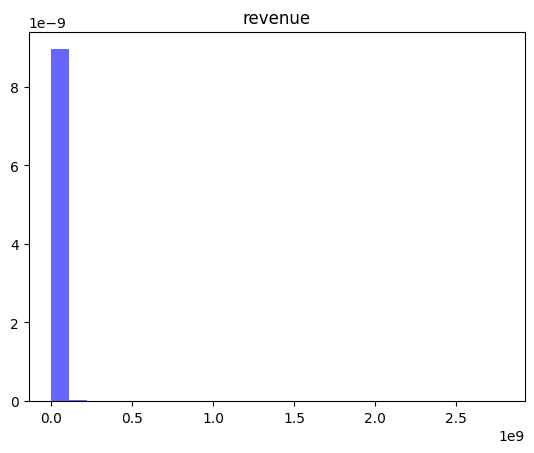

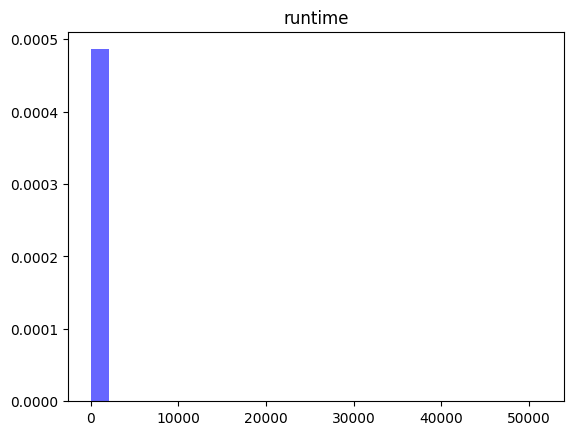

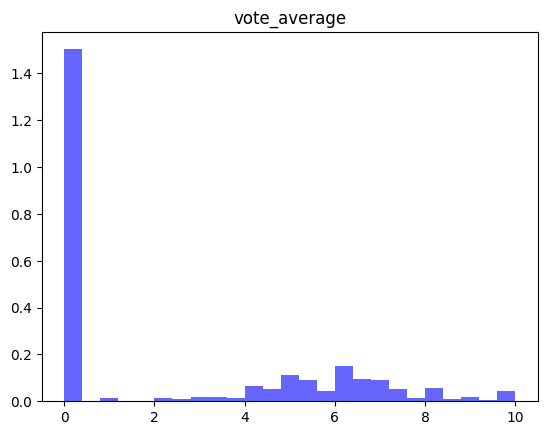

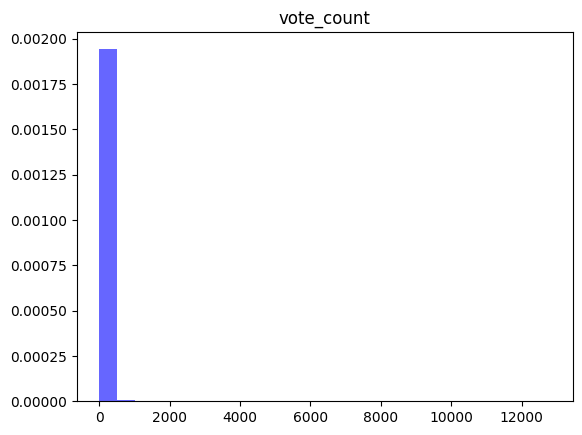

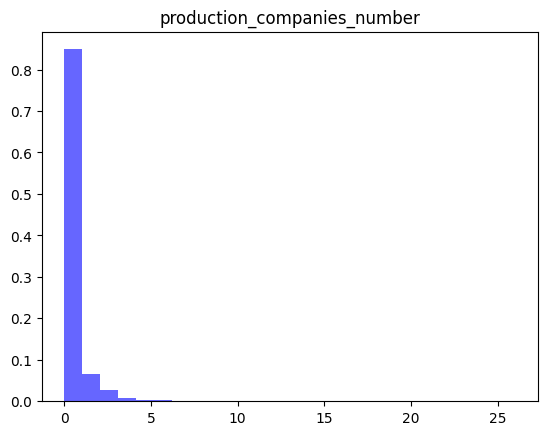

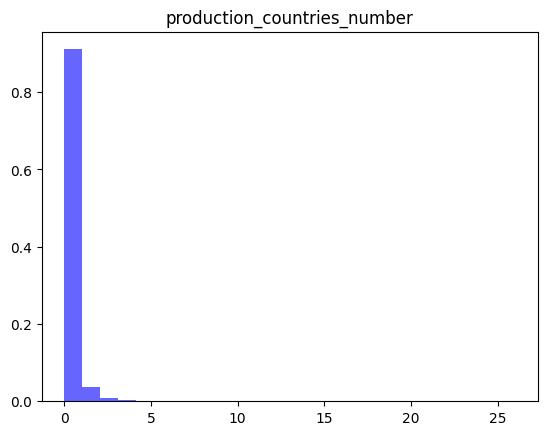

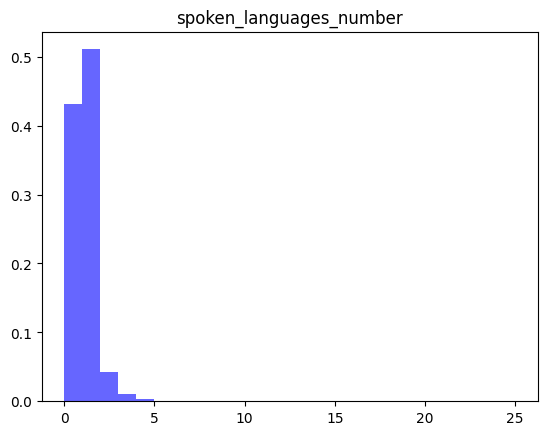

In [24]:
for col in numeric_cols_df.columns:
    plt.hist(numeric_cols_df[col], bins=25, density=True, alpha=0.6, color='b')
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='budget', ylabel='Density'>

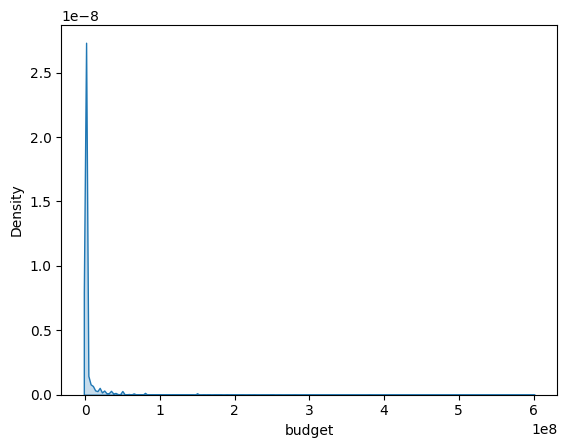

In [51]:
sns.kdeplot(numeric_cols_df['budget'], shade=True)

In [52]:
from sklearn import preprocessing

In [55]:
numeric_cols_df[['budget']]

budget
0             0
1             0
2       4000000
3             0
4         42000
...         ...
329039        0
329040        0
329041        0
329042        0
329043        0

[329030 rows x 1 columns]

In [89]:
['budget', 'revenue', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number']

Index(['budget', 'revenue', 'runtime', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number'],
      dtype='object')

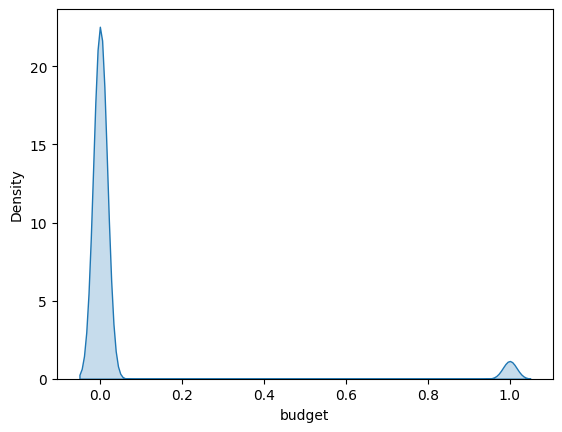

In [104]:
col_norm = preprocessing.normalize(numeric_cols_df[['budget']])
col_norm_df = pd.DataFrame(col_norm, columns=['budget'])

sns.kdeplot(col_norm_df['budget'], shade=True);

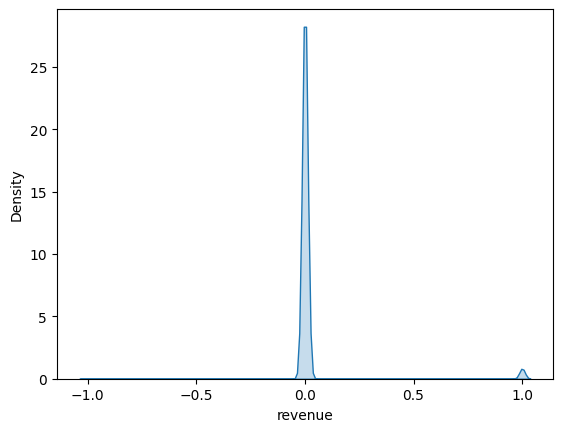

In [105]:
col_norm = preprocessing.normalize(numeric_cols_df[['revenue']])
col_norm_df = pd.DataFrame(col_norm, columns=['revenue'])

sns.kdeplot(col_norm_df['revenue'], shade=True);

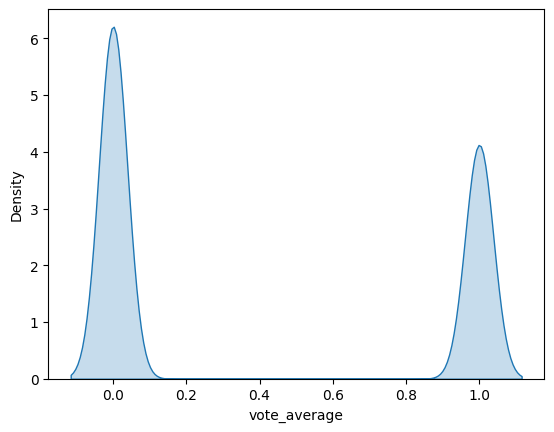

In [106]:
col_norm = preprocessing.normalize(numeric_cols_df[['vote_average']])
col_norm_df = pd.DataFrame(col_norm, columns=['vote_average'])

sns.kdeplot(col_norm_df['vote_average'], shade=True);

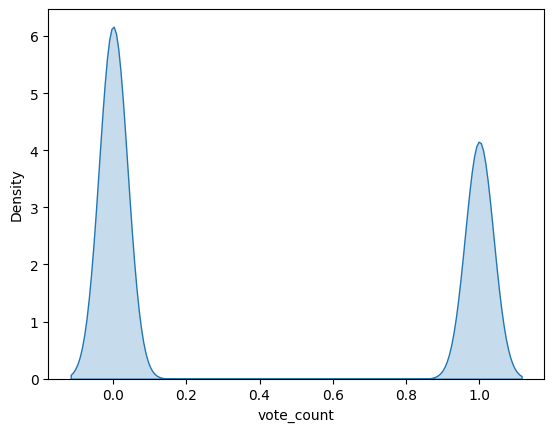

In [107]:
col_norm = preprocessing.normalize(numeric_cols_df[['vote_count']])
col_norm_df = pd.DataFrame(col_norm, columns=['vote_count'])

sns.kdeplot(col_norm_df['vote_count'], shade=True);

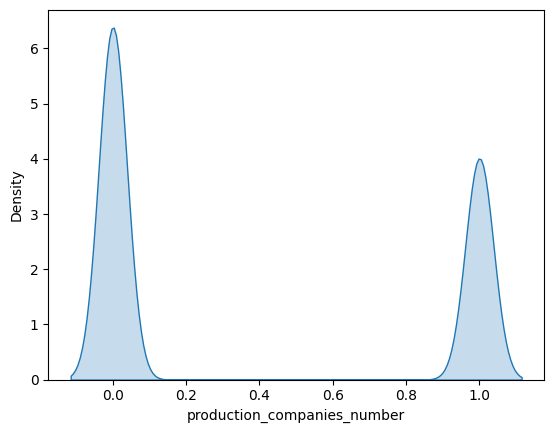

In [103]:
col_norm = preprocessing.normalize(numeric_cols_df[['production_companies_number']])
col_norm_df = pd.DataFrame(col_norm, columns=['production_companies_number'])

sns.kdeplot(col_norm_df['production_companies_number'], shade=True);

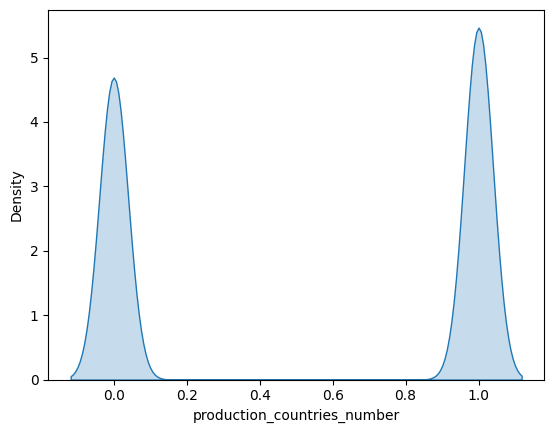

In [108]:
col_norm = preprocessing.normalize(numeric_cols_df[['production_countries_number']])
col_norm_df = pd.DataFrame(col_norm, columns=['production_countries_number'])

sns.kdeplot(col_norm_df['production_countries_number'], shade=True);

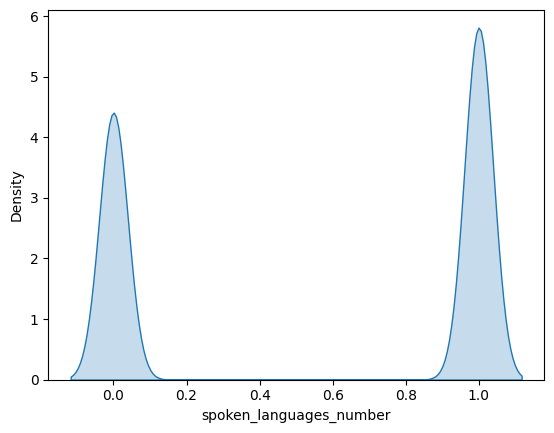

In [109]:
col_norm = preprocessing.normalize(numeric_cols_df[['spoken_languages_number']])
col_norm_df = pd.DataFrame(col_norm, columns=['spoken_languages_number'])

sns.kdeplot(col_norm_df['spoken_languages_number'], shade=True);

In [112]:
col_norm_df.value_counts()

spoken_languages_number
1.0                        187116
0.0                        141914
dtype: int64